- 데이터 로딩 및 처리

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Using TensorFlow backend.


# 1. 네트워크 크기 축소

- model01: 각 층의 노드가 16개

In [2]:
from keras.models import Sequential
from keras.layers import Dense

model01 = Sequential()
model01.add(Dense(16, activation='relu', input_shape=(10000,)))
model01.add(Dense(16, activation='relu'))
model01.add(Dense(1, activation='sigmoid'))
model01.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

- model02: 각층의 노드가 6개

In [3]:
model02 = Sequential()
model02.add(Dense(6, activation='relu', input_shape=(10000,)))
model02.add(Dense(6, activation='relu'))
model02.add(Dense(1, activation='sigmoid'))
model02.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model01_hist = model01.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 169us/step - loss: 0.4575 - acc: 0.8242 - val_loss: 0.3481 - val_acc: 0.8719
Epoch 2/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.2625 - acc: 0.9101 - val_loss: 0.2859 - val_acc: 0.8895
Epoch 3/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.1984 - acc: 0.9295 - val_loss: 0.2986 - val_acc: 0.8792
Epoch 4/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.1672 - acc: 0.9414 - val_loss: 0.2950 - val_acc: 0.8833
Epoch 5/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.1451 - acc: 0.9492 - val_loss: 0.3096 - val_acc: 0.8800
Epoch 6/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.1254 - acc: 0.9574 - val_loss: 0.3329 - val_acc: 0.8760
Epoch 7/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.1113 - acc: 0.9604 - val_loss: 0.3663 - 

In [5]:
model02_hist = model02.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 131us/step - loss: 0.5042 - acc: 0.8139 - val_loss: 0.3957 - val_acc: 0.8719
Epoch 2/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.3150 - acc: 0.8976 - val_loss: 0.3148 - val_acc: 0.8840
Epoch 3/20
25000/25000 [==============================] - 3s 133us/step - loss: 0.2433 - acc: 0.9179 - val_loss: 0.2863 - val_acc: 0.8895
Epoch 4/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.2032 - acc: 0.9312 - val_loss: 0.2773 - val_acc: 0.8907
Epoch 5/20
25000/25000 [==============================] - 3s 125us/step - loss: 0.1779 - acc: 0.9384 - val_loss: 0.2800 - val_acc: 0.8892
Epoch 6/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.1587 - acc: 0.9458 - val_loss: 0.2882 - val_acc: 0.8856
Epoch 7/20
25000/25000 [==============================] - 3s 123us/step - loss: 0.1440 - acc: 0.9515 - val_loss: 0.3009 - 

In [6]:
epochs = range(1, 21)
model01_loss = model01_hist.history['val_loss']
model02_loss = model02_hist.history['val_loss']

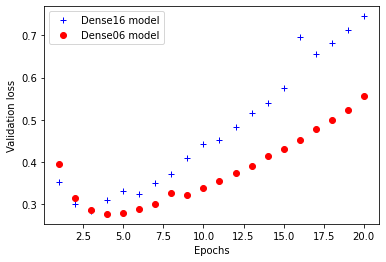

In [7]:
import matplotlib.pyplot as plt
plt.plot(epochs, model01_loss, 'b+', label='Dense16 model')
plt.plot(epochs, model02_loss, 'ro', label='Dense06 model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend();

- model03: 각층의 노드가 1024개

In [8]:
model03 = Sequential()
model03.add(Dense(1024, activation='relu', input_shape=(10000,)))
model03.add(Dense(1024, activation='relu'))
model03.add(Dense(1, activation='sigmoid'))
model03.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [9]:
model03_hist = model03.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 133us/step - loss: 0.5108 - acc: 0.7817 - val_loss: 0.2845 - val_acc: 0.8857
Epoch 2/20
25000/25000 [==============================] - 3s 131us/step - loss: 0.2246 - acc: 0.9115 - val_loss: 0.3299 - val_acc: 0.8628
Epoch 3/20
25000/25000 [==============================] - 3s 134us/step - loss: 0.1089 - acc: 0.9612 - val_loss: 0.3561 - val_acc: 0.8798
Epoch 4/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.0833 - acc: 0.9826 - val_loss: 0.4377 - val_acc: 0.8848
Epoch 5/20
25000/25000 [==============================] - 3s 133us/step - loss: 0.0978 - acc: 0.9851 - val_loss: 0.4820 - val_acc: 0.8842
Epoch 6/20
25000/25000 [==============================] - 3s 133us/step - loss: 7.9981e-04 - acc: 1.0000 - val_loss: 0.6602 - val_acc: 0.8832
Epoch 7/20
25000/25000 [==============================] - 3s 131us/step - loss: 0.1679 - acc: 0.9874 - val_loss: 0.618

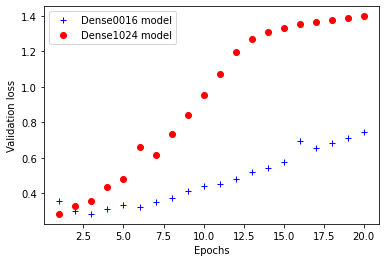

In [10]:
model03_loss = model03_hist.history['val_loss']

plt.plot(epochs, model01_loss, 'b+', label='Dense0016 model')
plt.plot(epochs, model03_loss, 'ro', label='Dense1024 model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend();

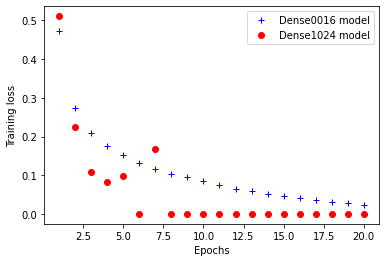

In [11]:
model01_train_loss = model01_hist.history['loss']
model03_train_loss = model03_hist.history['loss']

plt.plot(epochs, model01_train_loss, 'b+', label='Dense0016 model')
plt.plot(epochs, model03_train_loss, 'ro', label='Dense1024 model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## 2. 가중치 규제 추가

In [12]:
from keras import regularizers

l2_model = Sequential()
l2_model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
l2_model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
l2_model.add(Dense(1, activation='sigmoid'))

In [13]:
l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [14]:
l2_model_hist = l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.4966 - acc: 0.8190 - val_loss: 0.4086 - val_acc: 0.8542
Epoch 2/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.3136 - acc: 0.9061 - val_loss: 0.3506 - val_acc: 0.8767
Epoch 3/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.2672 - acc: 0.9184 - val_loss: 0.3359 - val_acc: 0.8818
Epoch 4/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.2450 - acc: 0.9278 - val_loss: 0.3368 - val_acc: 0.8829
Epoch 5/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.2294 - acc: 0.9355 - val_loss: 0.3395 - val_acc: 0.8817
Epoch 6/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.2213 - acc: 0.9380 - val_loss: 0.3445 - val_acc: 0.8822
Epoch 7/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.2135 - acc: 0.9414 - val_loss: 0.3617 - 

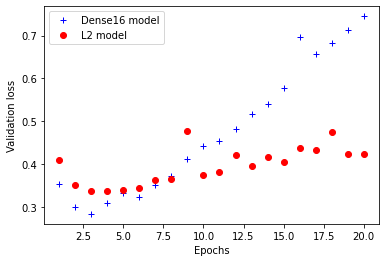

In [15]:
l2_model_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, model01_loss, 'b+', label='Dense16 model')
plt.plot(epochs, l2_model_loss, 'ro', label='L2 model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

```python

# L1 규제
regularizers.l1(0.001)

# L1과 L2 규제 병행
regularizers.l1_l2(l1=0.001, l2=0.001)
```

## 3. 드롭아웃 추가

In [16]:
from keras.layers import Dense, Dropout

dpt_model = Sequential()
dpt_model.add(Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(16, activation='relu'))
dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [17]:
dpt_model_hist = dpt_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.5889 - acc: 0.6865 - val_loss: 0.4332 - val_acc: 0.8676
Epoch 2/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.4375 - acc: 0.8129 - val_loss: 0.3331 - val_acc: 0.8762
Epoch 3/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.3503 - acc: 0.8614 - val_loss: 0.2848 - val_acc: 0.8890
Epoch 4/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.2966 - acc: 0.8867 - val_loss: 0.2758 - val_acc: 0.8902
Epoch 5/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.2565 - acc: 0.9070 - val_loss: 0.2821 - val_acc: 0.8892
Epoch 6/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.2281 - acc: 0.9205 - val_loss: 0.2979 - val_acc: 0.8857
Epoch 7/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.2082 - acc: 0.9257 - val_loss: 0.3104 - 

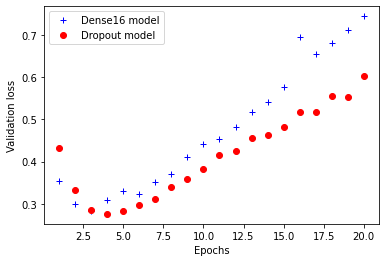

In [18]:
dpt_model_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, model01_loss, 'b+', label='Dense16 model')
plt.plot(epochs, dpt_model_loss, 'ro', label='Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()